Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

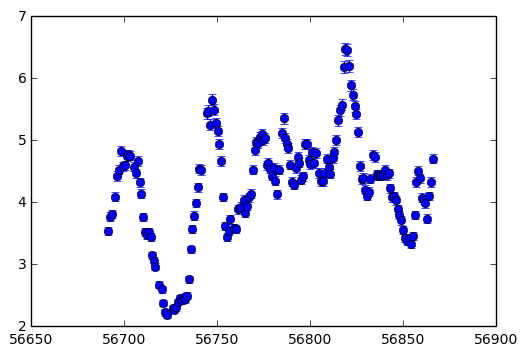

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm

ref_file="lc/1367A.lc"
echo_file="lc/6175A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqd




array([ 0.00964867,  0.02886003,  0.0556922 ,  0.08632291,  0.13380051,
        0.20739079,  0.32145572,  0.49825637])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

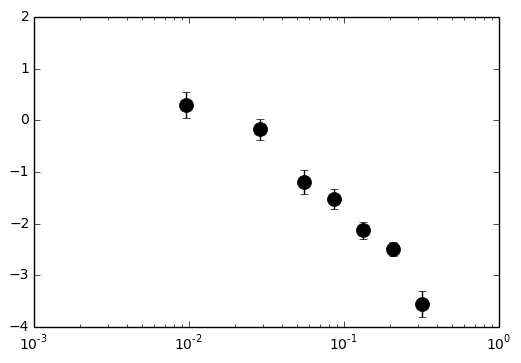

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

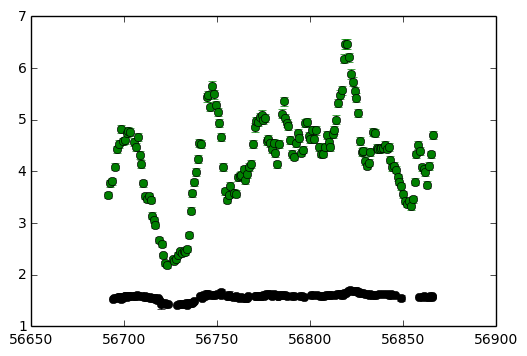

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.356e-01 6.706e+01 inf -- -2.964e+02 -- 1 1 1 1 1 1 1 1
   2 7.719e-01 6.609e+01 8.091e+01 -- -2.155e+02 -- 0.566297 0.565079 0.565579 0.565108 0.564503 0.565385 0.564367 0.564961
   3 3.379e+00 6.484e+01 7.996e+01 -- -1.355e+02 -- 0.138579 0.130954 0.131695 0.130103 0.128857 0.130335 0.128712 0.130511
   4 1.429e+00 6.354e+01 7.865e+01 -- -5.686e+01 -- -0.27205 -0.301257 -0.300578 -0.304918 -0.306545 -0.305024 -0.306246 -0.301896
   5 5.891e-01 6.225e+01 7.700e+01 -- 2.014e+01 -- -0.639865 -0.728428 -0.729483 -0.7395 -0.741278 -0.740758 -0.740477 -0.732461
   6 3.717e-01 6.064e+01 7.473e+01 -- 9.487e+01 -- -0.916158 -1.1392 -1.15122 -1.17266 -1.17468 -1.17713 -1.17495 -1.16261
   7 2.723e-01 5.813e+01 7.142e+01 -- 1.663e+02 -- -1.05542 -1.49675 -1.55907 -1.60318 -1.60661 -1.61473 -1.61106 -1.59295
   8 2.151e-01 5.427e+01 6.693e+01 -- 2.332e+02 -- -1.09159 -1.71699 -1.94737 -2.02949 -2.03872 -2.0544 -2.04928 -2.02094
   9 1.766e-01 4.902e+01 6.164e+01 -- 2.949e+02 -- -1.0864 -1.

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 4.687e+02 4.637e+02 -1.021e+00 -2.145e-02 9.96 +++
+++ 4.687e+02 4.671e+02 -1.021e+00 -5.214e-01 3.22 +++
+++ 4.687e+02 4.682e+02 -1.021e+00 -7.714e-01 0.935 +++
+++ 4.687e+02 4.677e+02 -1.021e+00 -6.464e-01 1.95 +++
+++ 4.687e+02 4.680e+02 -1.021e+00 -7.089e-01 1.41 +++
+++ 4.687e+02 4.681e+02 -1.021e+00 -7.402e-01 1.16 +++
+++ 4.687e+02 4.682e+02 -1.021e+00 -7.558e-01 1.05 +++
+++ 4.687e+02 4.682e+02 -1.021e+00 -7.636e-01 0.99 +++
+++ 4.687e+02 4.682e+02 -1.021e+00 -7.597e-01 1.02 +++
+++ 4.687e+02 4.682e+02 -1.021e+00 -7.617e-01   1 +++
	### errors for param 1 ###
+++ 4.687e+02 4.683e+02 -1.793e+00 -1.589e+00 0.875 +++
+++ 4.687e+02 4.678e+02 -1.793e+00 -1.487e+00 1.84 +++
+++ 4.687e+02 4.680e+02 -1.793e+00 -1.538e+00 1.33 +++
+++ 4.687e+02 4.681e+02 -1.793e+00 -1.563e+00 1.09 +++
+++ 4.687e+02 4.682e+02 -1.793e+00 -1.576e+00 0.981 +++
+++ 4.687e+02 4.682e+02 -1.793e+00 -1.569e+00 1.04 +++
+++ 4.687e+02 4.682e+02 -1.793e+00 -1.573e+00 1.01 +++
	### er

<Container object of 3 artists>

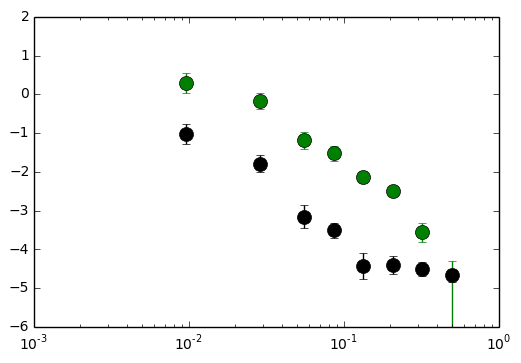

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 1.071e+02 1.046e+01 inf -- 5.152e+02 -- -0.660422 -1.28544 -2.47192 -2.81652 -3.57876 -3.74527 -4.32957 -6.63198 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 2.672e+01 1.099e+01 2.000e+00 -- 5.172e+02 -- -0.619685 -1.25308 -2.4665 -2.85762 -3.55873 -3.77022 -4.28599 -6.33198 0.133144 0.179124 0.1802 0.166312 0.0659412 0.140772 0.112456 -0.971453
   5 9.529e+00 1.283e+01 1.721e+00 -- 5.189e+02 -- -0.585859 -1.22408 -2.4589 -2.89696 -3.54076 -3.79301 -4.25035 -6.03198 0.157464 0.240277 0.249232 0.240742 0.0381923 0.179734 0.122603 1.62466
   7 2.140e+01 1.475e+01 1.536e+00 -- 5.204e+02 -- -0.557456 -1.19853 -2.45014 -2.93384 -3.52464 -3.81372 -4.22037 -6.12619 0.175865 0.28851 0.308387 0.323331 0.0151409 0.217034 0.131397 0.0766008
   9 4.054e+01 1.673e+01 1.375e+00 -- 5.218e+02 -- -0.53338 -1.17617 -2.44091 -2.96736 -3.51007 -3.8326 -4.19508 -5.82619 0.19012 0.327294 0.359004 0.414056 -0.00394175 0.251863 0.139262 -0.0873399
  11 1.539e+02 1.878e+01 1.257e+00 -- 5.231e+02 -- -0.512807 -1.1

In [11]:
%autoreload
p, pe = clag.errors(Cx, p, pe)

ERROR:root:Line magic function `%autoreload` not found.


	### errors for param 0 ###
+++ 5.384e+02 5.381e+02 -3.653e-01 -3.636e-01 0.473 +++
+++ 5.384e+02 5.376e+02 -3.653e-01 -3.628e-01 1.49 +++
+++ 5.384e+02 5.379e+02 -3.653e-01 -3.632e-01 0.867 +++
+++ 5.384e+02 5.378e+02 -3.653e-01 -3.630e-01 1.14 +++
+++ 5.384e+02 5.379e+02 -3.653e-01 -3.631e-01 0.998 +++
	### errors for param 1 ###
+++ 5.384e+02 5.382e+02 -1.004e+00 -9.986e-01 0.343 +++
+++ 5.384e+02 5.379e+02 -1.004e+00 -9.961e-01 0.962 +++
+++ 5.384e+02 5.376e+02 -1.004e+00 -9.949e-01 1.48 +++
+++ 5.384e+02 5.378e+02 -1.004e+00 -9.955e-01 1.2 +++
+++ 5.384e+02 5.378e+02 -1.004e+00 -9.958e-01 1.08 +++
+++ 5.384e+02 5.378e+02 -1.004e+00 -9.959e-01 1.02 +++
+++ 5.384e+02 5.379e+02 -1.004e+00 -9.960e-01 0.989 +++
+++ 5.384e+02 5.378e+02 -1.004e+00 -9.960e-01   1 +++
	### errors for param 2 ###
+++ 5.384e+02 5.382e+02 -2.352e+00 -2.288e+00 0.363 +++
+++ 5.384e+02 5.378e+02 -2.352e+00 -2.256e+00 1.15 +++
+++ 5.384e+02 5.380e+02 -2.352e+00 -2.272e+00 0.665 +++
+++ 5.384e+02 5.379e+02 -2.352

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([ 4.29089818,  3.08255955,  2.39741626,  2.78529154, -0.1630473 ,
        0.39141847,  0.14017202, -0.03115664])

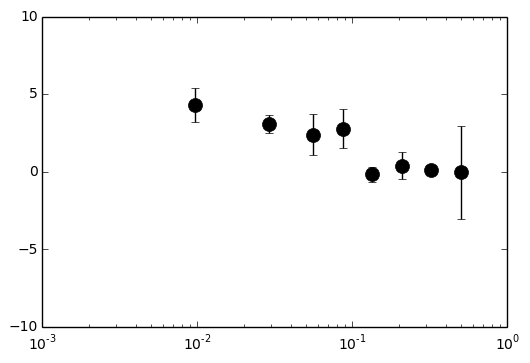

In [13]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

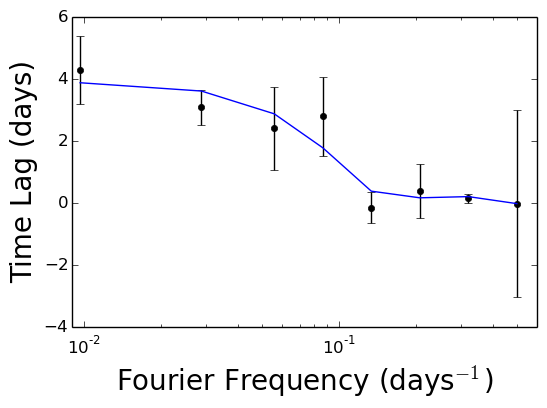

In [15]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.6)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)

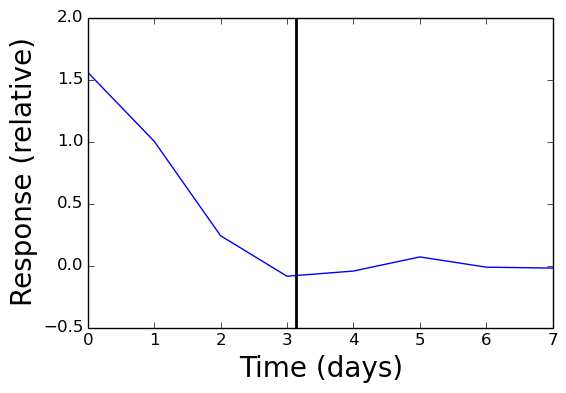

In [16]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([3.13,3.13], [-50, 50], color='k', linestyle='-', linewidth=2)